# Object-based filtering of pixel classifications <img align="right" src="../../Supplementary_data/DE_Africa_Logo_Stacked_RGB_small.jpg">


***
## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load Packages

In [1]:
import scipy
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
#from datacube.utils.cog import write_cog
from scipy.ndimage.measurements import _stats
from skimage.segmentation import quickshift
import pandas as pd
import rasterio
from affine import Affine
from pyproj import Proj, transform
# Required libraries
from pathlib import Path
from io import BytesIO
from glob import glob

from tqdm.notebook import tqdm
import tifffile as tiff
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure



In [2]:
# Required libraries
from pathlib import Path
from io import BytesIO
from glob import glob

from tqdm.notebook import tqdm
import tifffile as tiff
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure

In [65]:
# The path to the source collection that was extracted from the download archive
collection_path = Path('E:\JANET\DG_pansharpen_images\worldview3_pansharp_2015')

In [4]:
import datetime
#the obeserved dates in the dataset
dates_raw = [
datetime.datetime(2015, 5, 8, 0, 0),
datetime.datetime(2015, 5, 22, 0, 0),
datetime.datetime(2015, 6, 3, 0, 0),
datetime.datetime(2015, 6, 29, 0, 0),
datetime.datetime(2015, 7, 24, 0, 0),
datetime.datetime(2015, 9, 10, 0, 0),
datetime.datetime(2015, 9, 12, 0, 0),
datetime.datetime(2015, 9, 13, 0, 0),
datetime.datetime(2015, 9, 25, 0, 0),
datetime.datetime(2015, 11, 21, 0, 0)
]

dates = []

for i in range(10):
    dt = "".join(str(dates_raw[i].date()).split("-"))
    dates.append(dt)

In [5]:
#Generate the bands pixels from the tifs
tif1 = f'/Janet/DG_pansharpen_images/worldview3_pansharp_2015/worldview3_tile_01_20150508.tif'
tif2 = f'/Janet/DG_pansharpen_images/worldview3_pansharp_2015/worldview3_tile_01_20150522.tif'


tif4 = f'/Janet/DG_pansharpen_images/worldview3_pansharp_2015/worldview3_tile_01_20150603.tif'
tif5 = f'/Janet/DG_pansharpen_images/worldview3_pansharp_2015/worldview3_tile_02_20150603.tif'
tif6 = f'/Janet/DG_pansharpen_images/worldview3_pansharp_2015/worldview3_tile_03_20150603.tif'
tif7 = f'/Janet/DG_pansharpen_images/worldview3_pansharp_2015/worldview3_tile_04_20150603.tif'

tif8 = f'/Janet/DG_pansharpen_images/worldview3_pansharp_2015/worldview3_tile_01_20150629.tif'
tif9 = f'/Janet/DG_pansharpen_images/worldview3_pansharp_2015/worldview3_tile_02_20150629.tif'
tif10 = f'/Janet/DG_pansharpen_images/worldview3_pansharp_2015/worldview3_tile_03_20150629.tif'

tif11 = f'/Janet/DG_pansharpen_images/worldview3_pansharp_2015/worldview3_tile_01_20150724.tif'
tif12 = f'/Janet/DG_pansharpen_images/worldview3_pansharp_2015/worldview3_tile_02_20150724.tif'
tif13= f'/Janet/DG_pansharpen_images/worldview3_pansharp_2015/worldview3_tile_03_20150724.tif'
tif14 = f'/Janet/DG_pansharpen_images/worldview3_pansharp_2015/worldview3_tile_04_20150724.tif'

tif15 = f'/Janet/DG_pansharpen_images/worldview3_pansharp_2015/worldview3_tile_01_20150910.tif'
tif16 = f'/Janet/DG_pansharpen_images/worldview3_pansharp_2015/worldview3_tile_01_20150912.tif'
tif17 = f'/Janet/DG_pansharpen_images/worldview3_pansharp_2015/worldview3_tile_01_20150925.tif'
tif18 = f'/Janet/DG_pansharpen_images/worldview3_pansharp_2015/worldview3_tile_01_20151121.tif'



#im1 = xr.open_rasterio(tif1).squeeze().values
#im1= im1.reshape(-1,4)
#worldview3_tile_01_20150508 = pd.DataFrame( im1)

im2 = xr.open_rasterio(tif2).squeeze().values
im2= im2.reshape(-1,4)
worldview3_tile_01_20150522 = pd.DataFrame( im2)
#im3 = xr.open_rasterio(tif3).squeeze().values
#im3= im3.reshape(-1,4)
#df_generated = pd.DataFrame( im)



In [6]:
im4 = xr.open_rasterio(tif4).squeeze().values
im4= im4.reshape(-1,4)
worldview3_tile_01_20150603 = pd.DataFrame(im4)

#im5 = xr.open_rasterio(tif5).squeeze().values
#im5= im5.reshape(-1,4)
#worldview3_tile_02_20150603 = pd.DataFrame(im5)

im6 = xr.open_rasterio(tif6).squeeze().values
im6= im6.reshape(-1,4)
worldview3_tile_03_20150603 = pd.DataFrame(im6)

im7 = xr.open_rasterio(tif7).squeeze().values
im7= im7.reshape(-1,4)
worldview3_tile_04_20150603 = pd.DataFrame(im7)

im8 = xr.open_rasterio(tif8).squeeze().values
im8= im8.reshape(-1,4)
worldview3_tile_01_20150629 = pd.DataFrame(im8)

#im9 = xr.open_rasterio(tif9).squeeze().values
#im9= im9.reshape(-1,4)
#worldview3_tile_02_20150629 = pd.DataFrame(im9)

im10 = xr.open_rasterio(tif10).squeeze().values
im10= im10.reshape(-1,4)
worldview3_tile_03_20150629 = pd.DataFrame( im10)


In [7]:
im11 = xr.open_rasterio(tif11).squeeze().values
im11= im11.reshape(-1,4)
worldview3_tile_01_20150724 = pd.DataFrame( im11)

im12 = xr.open_rasterio(tif12).squeeze().values
im12= im12.reshape(-1,4)
worldview3_tile_02_20150724 = pd.DataFrame(im12)

im13 = xr.open_rasterio(tif13).squeeze().values
im13= im13.reshape(-1,4)
worldview3_tile_03_20150724 = pd.DataFrame(im13)

im14 = xr.open_rasterio(tif14).squeeze().values
im14= im14.reshape(-1,4)
worldview3_tile_04_20150724 = pd.DataFrame(im14)

im15 = xr.open_rasterio(tif15).squeeze().values
im15= im15.reshape(-1,4)
worldview3_tile_01_20150910 = pd.DataFrame(im15)


im16 = xr.open_rasterio(tif16).squeeze().values
im16= im16.reshape(-1,4)
worldview3_tile_01_20150912 = pd.DataFrame(im16)

im17 = xr.open_rasterio(tif17).squeeze().values
im17= im17.reshape(-1,4)
worldview3_tile_01_20150925 = pd.DataFrame(im17)

im18 = xr.open_rasterio(tif18).squeeze().values
im18= im18.reshape(-1,4)
worldview3_tile_01_20151121 = pd.DataFrame(im18)


In [23]:
worldview3_tile_01_20150508.shape,
worldview3_tile_01_20150522.shape,
worldview3_tile_01_20150603.shape,
worldview3_tile_02_20150603.shape,
worldview3_tile_03_20150603.shape,
worldview3_tile_04_20150603.shape,
worldview3_tile_01_20150629.shape,
worldview3_tile_02_20150629.shape,
worldview3_tile_03_20150629.shape,
worldview3_tile_01_20150724.shape,
worldview3_tile_02_20150724.shape,
worldview3_tile_03_20150724.shape,
worldview3_tile_04_20150724.shape,
worldview3_tile_01_20150910.shape,
worldview3_tile_01_20150912.shape,
worldview3_tile_01_20150925.shape,
worldview3_tile_01_20151121.shape

(268435456, 4)

In [29]:
worldview3_tile_03_20150603.shape

(268435456, 4)

### Extracting coordinates from each tif

In [17]:
pwd

'E:\\JANET\\DG_pansharpen_images'

tif8 = f'/Janet/DG_pansharpen_images/worldview3_pansharp_2015/worldview3_tile_01_20150629.tif'
with rasterio.open(tif8) as r:
    T0 = r.transform  # upper-left pixel corner affine transform
    p1 = Proj(r.crs)
    A = r.read()  # pixel values

In [67]:
im = xr.open_rasterio("worldview3_pansharp_2015/clip_worldview3_tile_01_20150925.tif").squeeze().values
#im= im.reshape(-1,4)
#masked = pd.DataFrame(im)

In [68]:
im.shape

(4, 2295, 3061)

In [69]:
im= im.reshape(-1,4)
masked = pd.DataFrame(im)

In [75]:
#masked.head(40)

In [48]:
#tif9 = f'/Janet/DG_pansharpen_images/worldview3_pansharp_2015/worldview3_tile_04_20150603.tif'
# Extract the coordinates; lon and lats for the respective bands
lats = []
longs = []

with rasterio.open('masked.tif') as r:
    T0 = r.transform  # upper-left pixel corner affine transform
    p1 = Proj(r.crs)
    A = r.read()  # pixel values

# All rows and columns
cols, rows = np.meshgrid(np.arange(A.shape[2]), np.arange(A.shape[1]))

# Get affine transform for pixel centres
T1 = T0 * Affine.translation(0.5, 0.5)
# Function to convert pixel row/column index (from 0) to easting/northing at centre
rc2en = lambda r, c: (c, r) * T1

# All eastings and northings (there is probably a faster way to do this)
eastings, northings = np.vectorize(rc2en, otypes=[float, float])(rows, cols)

# Project all longitudes, latitudes
p2 = Proj(proj='latlong',datum='WGS84')
longs, lats = transform(p1, p2, eastings, northings)
 
#Get the coords for all tiles tifs
#longs = np.concatenate((longs1, longs2,longs3,longs4,longs5,longs6))
#lats = np.concatenate((lats1, lats2,lats3,lats4,lats5,lats6))

 # reshape the coordinates
longs= longs.reshape(-1,1)
lats= lats.reshape(-1,1)

# create dataframes to concanate with the main dataframe
lon = pd.DataFrame(longs,columns = ['lon'])
lat = pd.DataFrame(lats,columns = ['lat'])

# concatenating coordinates and bands for the 6 tiles along columns
data  = pd.concat([masked , lon, lat], axis=1)
#save the dataframes as a csv file
data.to_csv("masked.csv", index = False)

E:\Anaconda\envs\geo_py37\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Right multiplication will be prohibited in version 3.0
E:\Anaconda\envs\geo_py37\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1


In [38]:
def masked_raster(input_file, raster_file):
    # Create a masked version of the input raster where pixels falling within one of the fields are set to `1` and pixels outside the fields are set to `0`
    
   
    # the polygon GeoJSON geometry
    geoms = [{'type': 'Polygon', 'coordinates': [[[8.221797, 11.600596], [8.221919, 11.556149], [8.266995, 11.556266], [8.266879, 11.600714], [8.221797, 11.600596]]]}]
    # load the raster, mask it by the polygon and crop it
    with rasterio.open(tif1) as src:
        out_img, out_transform = mask(src, geoms, invert=True)
    out_meta = src.meta.copy()

    # save the resulting raster  
    out_meta.update({"driver": "GTiff",
    "height": out_image.shape[1],
    "width": out_image.shape[2],
    "transform": out_transform})

    
    return out_img

def reproject_raster(raster_file, dst_crs):
    # Reproject the input raster to the provided CRS
    
    with rasterio.open("masked.tif", "w", **out_meta) as dst:
        dst.write(out_image)


    dst = src
    
    return dst

assert masked_raster('kofa_reduced.geojson', tif1)[0].sum()> 0, "Sorry wrong answer"
assert str(reproject_raster(tif1, 'EPSG:4326').crs) == 'EPSG:4326', "Sorry wrong answer"
print("Congratulations, all is working just fine !!!")

In [13]:
import fiona

with fiona.open("kofa_reduced.geojson", "r") as vectorfile:
    shapes = [feature["geometry"] for feature in vectorfile]

In [20]:
from rasterio.mask import mask
data = rasterio.open(tif1, 'r')
out_image, out_transform = mask(dataset=data, shapes=shapes, invert=True)

E:\Anaconda\envs\geo_py37\lib\site-packages\rasterio\mask.py:92: UserWarning: shapes are outside bounds of raster. Are they in different coordinate reference systems?
  warnings.warn('shapes are outside bounds of raster. '


In [26]:
out_meta = data.meta.copy()

In [28]:
data.close()
out_meta.update({"driver": "GTiff",
          "height": out_image.shape[1],
          "width": out_image.shape[2],
          "transform": out_transform})

In [29]:
with rasterio.open("clipped.tif", "w", **out_meta) as dest:
    dest.write(out_image)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 16384, 'height': 16384, 'count': 4, 'crs': CRS.from_epsg(32632), 'transform': Affine(0.5, 0.0, 415160.0,
       0.0, -0.5, 1282506.0), 'tiled': False, 'interleave': 'pixel'}


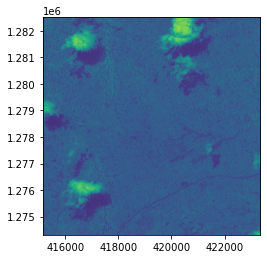

In [42]:
from rasterio.plot import show
cmap = plt.cm.viridis
# quickly load and check
with rasterio.open('masked.tif', 'r') as data3:
    print(data3.profile)
    show(data3, cmap=cmap)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 16384, 'height': 16384, 'count': 4, 'crs': CRS.from_epsg(32632), 'transform': Affine(0.5, 0.0, 415160.0,
       0.0, -0.5, 1282506.0), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}


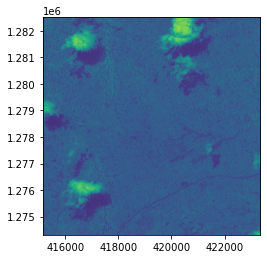

In [33]:
from rasterio.plot import show
cmap = plt.cm.viridis
# quickly load and check
with rasterio.open(tif1, 'r') as data2:
    print(data2.profile)
    show(data2, cmap=cmap)

In [19]:
data.columns = ['20150508_B1',"20150508_B2","20150508_B3","20150508_B4","lon","lat"]

In [50]:
import geojson as gj
from osgeo import ogr, osr, gdal

# Enable GDAL/OGR exceptions
gdal.UseExceptions()


# GDAL & OGR memory drivers
GDAL_MEMORY_DRIVER = gdal.GetDriverByName('MEM')
OGR_MEMORY_DRIVER = ogr.GetDriverByName('Memory')


def cut_by_geojson(input_file, output_file, shape_geojson):

    # Get coords for bounding box
    x, y = zip(*gj.utils.coords(gj.loads(shape_geojson)))
    min_x, max_x, min_y, max_y = min(x), max(x), min(y), max(y)

    # Open original data as read only
    dataset = gdal.Open(input_file, gdal.GA_ReadOnly)

    bands = dataset.RasterCount

    # Getting georeference info
    transform = dataset.GetGeoTransform()
    projection = dataset.GetProjection()
    xOrigin = transform[0]
    yOrigin = transform[3]
    pixelWidth = transform[1]
    pixelHeight = -transform[5]

    # Getting spatial reference of input raster
    srs = osr.SpatialReference()
    srs.ImportFromWkt(projection)

    # WGS84 projection reference
    OSR_WGS84_REF = osr.SpatialReference()
    OSR_WGS84_REF.ImportFromEPSG(4326)

    # OSR transformation
    wgs84_to_image_trasformation = osr.CoordinateTransformation(OSR_WGS84_REF,
                                                                srs)
    XYmin = wgs84_to_image_trasformation.TransformPoint(min_x, max_y)
    XYmax = wgs84_to_image_trasformation.TransformPoint(max_x, min_y)

    # Computing Point1(i1,j1), Point2(i2,j2)
    i1 = int((XYmin[0] - xOrigin) / pixelWidth)
    j1 = int((yOrigin - XYmin[1]) / pixelHeight)
    i2 = int((XYmax[0] - xOrigin) / pixelWidth)
    j2 = int((yOrigin - XYmax[1]) / pixelHeight)
    new_cols = i2 - i1 + 1
    new_rows = j2 - j1 + 1

    # New upper-left X,Y values
    new_x = xOrigin + i1 * pixelWidth
    new_y = yOrigin - j1 * pixelHeight
    new_transform = (new_x, transform[1], transform[2], new_y, transform[4],
                     transform[5])

    wkt_geom = ogr.CreateGeometryFromJson(str(shape_geojson))
    wkt_geom.Transform(wgs84_to_image_trasformation)

    target_ds = GDAL_MEMORY_DRIVER.Create('', new_cols, new_rows, 1,
                                          gdal.GDT_Byte)
    target_ds.SetGeoTransform(new_transform)
    target_ds.SetProjection(projection)

    # Create a memory layer to rasterize from.
    ogr_dataset = OGR_MEMORY_DRIVER.CreateDataSource('shapemask')
    ogr_layer = ogr_dataset.CreateLayer('shapemask', srs=srs)
    ogr_feature = ogr.Feature(ogr_layer.GetLayerDefn())
    ogr_feature.SetGeometryDirectly(ogr.Geometry(wkt=wkt_geom.ExportToWkt()))
    ogr_layer.CreateFeature(ogr_feature)

    gdal.RasterizeLayer(target_ds, [1], ogr_layer, burn_values=[1],
                        options=["ALL_TOUCHED=TRUE"])

    # Create output file
    driver = gdal.GetDriverByName('GTiff')
    outds = driver.Create(output_file, new_cols, new_rows, bands,
                          gdal.GDT_Float32)

    # Read in bands and store all the data in bandList
    mask_array = target_ds.GetRasterBand(1).ReadAsArray()
    band_list = []

    for i in range(bands):
        band_list.append(dataset.GetRasterBand(i + 1).ReadAsArray(i1, j1,
                         new_cols, new_rows))

    for j in range(bands):
        data = np.where(mask_array == 1, band_list[j], mask_array)
        outds.GetRasterBand(j + 1).SetNoDataValue(0)
        outds.GetRasterBand(j + 1).WriteArray(data)

    outds.SetProjection(projection)
    outds.SetGeoTransform(new_transform)

    target_ds = None
    dataset = None
    outds = None
    ogr_dataset = None

In [57]:
pwd

'E:\\JANET\\DG_pansharpen_images'

In [53]:
import rioxarray
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [58]:
xds = rioxarray.open_rasterio(
   'worldview3_pansharp_2015/worldview3_tile_01_20150508.tif',
    masked=True,
)
xds

<xarray.DataArray (band: 4, y: 16384, x: 16384)>
[1073741824 values with dtype=float32]
Coordinates:
  * band         (band) int32 1 2 3 4
  * x            (x) float64 4.152e+05 4.152e+05 ... 4.234e+05 4.234e+05
  * y            (y) float64 1.283e+06 1.283e+06 ... 1.274e+06 1.274e+06
    spatial_ref  int32 0
Attributes:
    RepresentationType:      ATHEMATIC
    STATISTICS_COVARIANCES:  20820.91707912933,25038.95635415157,17357.448351...
    STATISTICS_MAXIMUM:      1766
    STATISTICS_MEAN:         530.15326502174
    STATISTICS_MINIMUM:      1
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       144.2945497208
    scale_factor:            1.0
    add_offset:              0.0

(array([3.63203900e+06, 2.27140198e+08, 5.04777147e+08, 2.87708515e+08,
        2.28335560e+07, 1.30565630e+07, 8.94983500e+06, 3.84134500e+06,
        1.80015200e+06, 2.47400000e+03]),
 array([1.0000e+00, 2.0560e+02, 4.1020e+02, 6.1480e+02, 8.1940e+02,
        1.0240e+03, 1.2286e+03, 1.4332e+03, 1.6378e+03, 1.8424e+03,
        2.0470e+03], dtype=float32),
 <BarContainer object of 10 artists>)

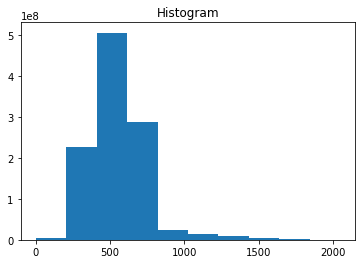

In [59]:
xds.plot()

In [ ]:

geoms = [{'type': 'Polygon', 'coordinates': [[[8.2343635423279018,11.5365866666666683], [8.2905699222882845,11.5780959460610120], [8.266995, 11.556266], [8.266879, 11.600714], [8.221797, 11.600596]]]}]
clipped = xds.rio.clip(geoms)

In [ ]:
clipped.plot()

In [ ]:
clipped.rio.to_raster("clipped.tif", compress='LZMA', tiled=True, dtype="int32")